<a href="https://colab.research.google.com/github/manglamkumar0621/Machine-Learning/blob/master/Covid19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To install a module which is not available in Colabouratry

In [0]:
!pip install geocoder

In [0]:
import folium
from folium.plugins import HeatMap
from folium.features import GeoJson
import json
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
import geocoder
%matplotlib inline

In [5]:
#from google.colab import files
uploaded1 = files.upload()

Saving CoronaDataset3003.xlsx to CoronaDataset3003.xlsx


In [6]:
#import io
dataset = pd.read_excel(io.BytesIO(uploaded1['CoronaDataset3003.xlsx']),sheet_name='District-wise')
dataset.columns = ['State', 'District', 'Confirmed','Latitude','Longitude']
dataset[['District', 'Confirmed']].head()

,District,Confirmed
0,GAUTAM BUDDHA NAGAR,29
1,AGRA,9
2,LUCKNOW,8
3,MEERUT,5
4,GHAZIABAD,3


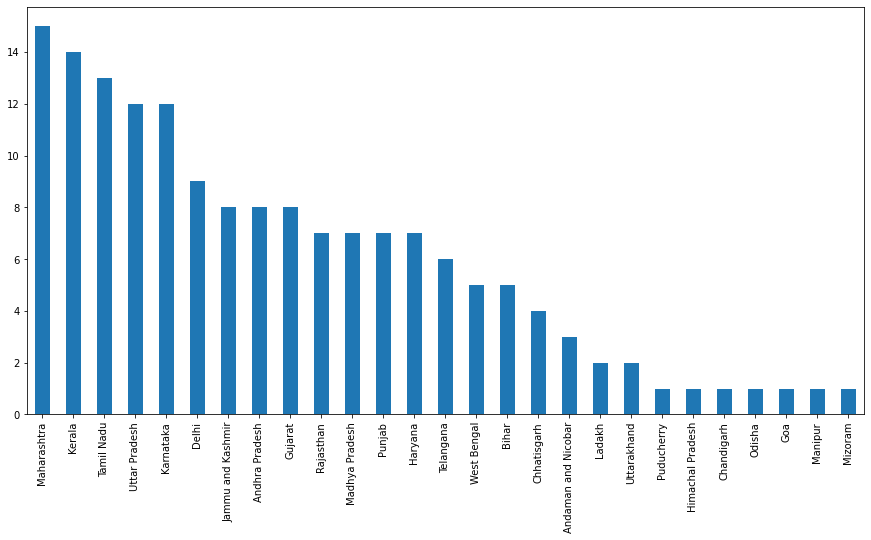

In [7]:
#import matplotlib.pyplot as plt
dataset['State'].value_counts().plot(kind='bar',figsize=[15,7.5]);

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      161 non-null    object 
 1   District   161 non-null    object 
 2   Confirmed  161 non-null    int64  
 3   Latitude   57 non-null     float64
 4   Longitude  57 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [9]:
#Removing the district not having coordinates details.
dataset_mod = dataset.dropna(axis= 0 , how = 'any')
dataset_mod.shape

(57, 5)

In [15]:
#Create a map focusing on INDIA
INDIA_COORDINATES = (20.5937, 78.9629)
map = folium.Map(location=INDIA_COORDINATES, zoom_start=5, max_zoom=20, tiles= 'OpenStreetMap')

for data in dataset_mod.itertuples() :
#for data in dataset.itertuples() :
  lat = data.Latitude
  log = data.Longitude
  #x = ('{},{}').format(data.District,data.State)
  #lat = geocoder.osm(x).lat
  #log = geocoder.osm(x).lng
  folium.Marker(location= [lat, log], tooltip=(data.District,'Confirmed : {}'.format(data.Confirmed)), icon= folium.Icon(color='red') ).add_to(map)
  #details = [[lat,log,data.Confirmed]]
  #HeatMap(details).add_to(map)
folium.LatLngPopup().add_to(map)
display(map)
#details


In [0]:
map.save("my_map1.html" )
download = files.download('my_map1.html')